In [9]:
import numpy as np

In [10]:
ml_residuals = np.loadtxt("../experiments/2d/ml/residuals_with_pressure_solver.dat")

In [11]:
mgpcg_residuals = np.loadtxt("../experiments/2d/mgpcg/residuals_with_pressure_solver.dat")

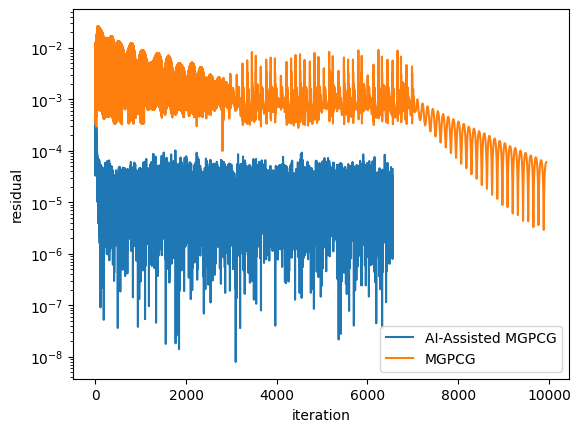

In [12]:
# plot the residuals
import matplotlib.pyplot as plt
plt.plot(ml_residuals, label="AI-Assisted MGPCG")
plt.plot(mgpcg_residuals, label="MGPCG")
plt.yscale('log')
plt.xlabel("iteration")
plt.ylabel("residual")
plt.legend()
plt.show()